In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
lista = ["ciao", "bello"]
lista = lista.remove("ciao")


In [3]:
import yaml
import pandas as pd
from pathlib import Path

from pipeline.walkforward import WFCVGenerator
from pipeline.wf_config import WFConfig
from utils.paths import CONFIG_DIR





# -------- load config --------
cfg = yaml.safe_load(open(CONFIG_DIR / "debug.yaml"))

# import wfcv
wf_config = WFConfig(**cfg["walkforward"])

wf = WFCVGenerator(config=wf_config)

data = next(wf.folds())
X_test = data[4]
y_test = data[5]

In [4]:
y_test

array([ 0.038396, -0.015873, -0.009042, ..., -0.008811,  0.000691,
        0.005724], shape=(115175,))

In [13]:
from tensorflow import keras
from training_routine.metrics import directional_accuracy_pct  # ensures registration

path = "./experiments/exp_008_20251014_203949_pippo_bigger_no_dropoutl2/trial_000/fold_000/model_best.keras"

model = keras.models.load_model(
    path,
    custom_objects={"Custom>directional_accuracy_pct": directional_accuracy_pct},
    compile=True,   # default; can omit
)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# X_test, y_test prepared already
y_pred = model.predict(X_test, verbose=0).reshape(-1)
y_true = np.asarray(y_test).reshape(-1)


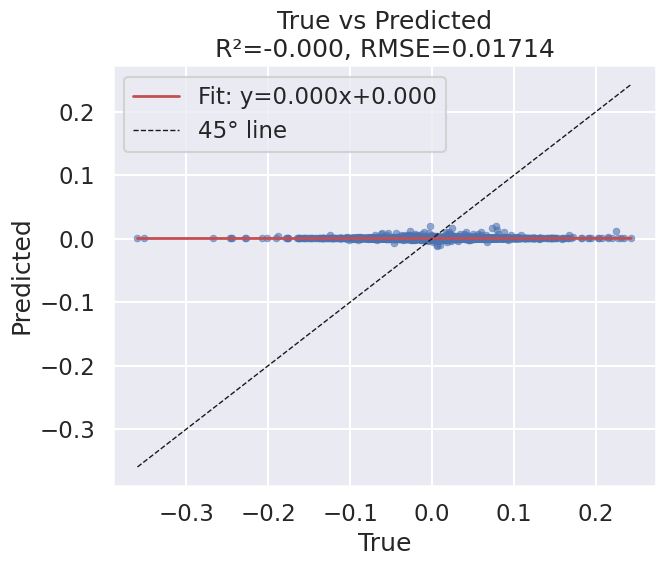

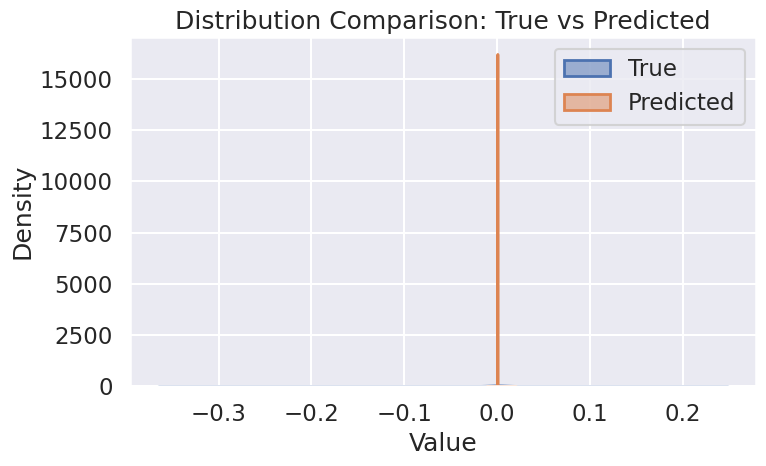

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# --- style ---
sns.set_theme(style="darkgrid", context="talk")

# --- regression fit ---
reg = LinearRegression().fit(y_true.reshape(-1,1), y_pred)
slope, intercept = reg.coef_[0], reg.intercept_
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

x_line = np.linspace(y_true.min(), y_true.max(), 200)
y_line = reg.predict(x_line.reshape(-1,1))

# ===================================================
# 1️⃣ Scatter plot: True vs Predicted
# ===================================================
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_true, y=y_pred, s=25, alpha=0.6, edgecolor=None)
plt.plot(x_line, y_line, 'r-', lw=2, label=f'Fit: y={slope:.3f}x+{intercept:.3f}')
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()], 'k--', lw=1, label="45° line")
plt.title(f"True vs Predicted\nR²={r2:.3f}, RMSE={rmse:.4g}")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.legend()
plt.tight_layout()
plt.show()

# ===================================================
# 2️⃣ Separate plot: Marginal KDEs
# ===================================================
plt.figure(figsize=(8,5))
sns.kdeplot(y_true, fill=True, alpha=0.5, label="True", linewidth=2)
sns.kdeplot(y_pred, fill=True, alpha=0.5, label="Predicted", linewidth=2)
plt.title("Distribution Comparison: True vs Predicted")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
np.unique(y_pred)

array([-0.01127909, -0.01012175, -0.00953935, ...,  0.01676849,
        0.01914254,  0.01999256], shape=(2429,), dtype=float32)

In [20]:
print("NaNs true/pred:", np.isnan(y_true).sum(), np.isnan(y_pred).sum())
print("std true/pred:", np.std(y_true), np.std(y_pred))


NaNs true/pred: 0 0
std true/pred: 0.017140044248702274 0.00022668244


In [1]:
import torch; print('Torch version:', torch.__version__); print('CUDA available:', torch.cuda.is_available()); print('Device:', torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU')


Torch version: 2.7.1
CUDA available: False
Device: CPU
